<a href="https://colab.research.google.com/github/Karla-Flores/Project-04/blob/main/Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from sklearn.linear_model import SGDClassifier
# import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Uploading ETL file
data = pd.read_csv('../Resources/chicago_crime_db.csv')
data.head(5)

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,False,True,41.815117,-87.670000,RESIDENCE,Afternoon,Autumn
1,THEFT,False,False,41.895080,-87.765400,CTA,Morning,Autumn
2,NARCOTICS,True,False,41.937406,-87.716650,PUBLIC OPEN SPACE,Afternoon,Autumn
3,ASSAULT,False,True,41.881903,-87.755121,RESIDENCE,Afternoon,Autumn
4,BURGLARY,False,False,41.744379,-87.658431,RESIDENCE,Morning,Autumn


In [6]:
data.shape

(6692644, 8)

In [7]:
# Return a random sample of items from an axis of object - Do NOT run!
data_ = data.sample(frac=0.05, random_state=42)
# data_.reset_index(drop = True, inplace=True)
data_.shape

(334632, 8)

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(data_, columns = ['Location Description', 'Primary Type', 'HOUR', 'SEASON'],dtype=float)
data_dummies.head()

,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,...,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
2228603,False,False,41.895748,-87.623536,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6656522,False,True,41.876135,-87.729029,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3386856,False,True,41.691929,-87.639944,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1508740,False,False,41.887114,-87.773855,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
264476,False,True,41.793378,-87.646354,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# pd.DataFrame(columns=data_dummies.columns).to_dict(orient='list')

In [10]:
# len(pd.DataFrame(columns=data_dummies.columns).to_dict(orient='list'))

In [11]:
# Split our preprocessed data into our features and target arrays
y = data_dummies.Arrest
X = data_dummies.drop('Arrest', axis=1)

In [12]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [13]:
# !pip install imblearn

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, InstanceHardnessThreshold

In [15]:
# cc = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [16]:
# cc = ClusterCentroids(random_state=42)
# X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [17]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
# scaler = StandardScaler().fit(X)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [18]:
cc = ClusterCentroids(random_state=42,n_jobs=-1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:120: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  warnings.warn(


KeyboardInterrupt: 

In [1]:
cc = InstanceHardnessThreshold(random_state=42)
X_test_resampled, y_test_resampled = cc.fit_resample(X_test, y_test)

NameError: name 'InstanceHardnessThreshold' is not defined

In [15]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [16]:
# Train the Logistic Regression model on the scaled data and print the model score
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train_scaled, y_resampled)
print(f'Training Score: {round(model.score(X_train_scaled, y_resampled)*100,4)}%')
print(f'Testing Score: {round(model.score(X_test_scaled, y_test)*100,4)}%')

Training Score: 76.6581%
Testing Score: 84.0912%


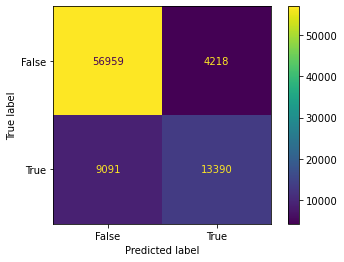

In [17]:
# Confusion Matrix Display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

In [18]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

       False       0.96      0.07      0.13     61177
        True       0.28      0.99      0.44     22481

    accuracy                           0.32     83658
   macro avg       0.62      0.53      0.29     83658
weighted avg       0.78      0.32      0.22     83658



In [19]:
# Making Predictions
predictions = model.predict(X_test)
result_df=pd.DataFrame({"Prediction": predictions, "Arrest": y_test})
result_df

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Arrest
5235808,True,False
4095730,True,False
5148405,True,False
6515975,True,False
566483,True,False
...,...,...
2556830,True,False
6676442,True,False
2512176,True,True
4492874,True,False


In [13]:
result_df['Prediction'].value_counts()

False    1414496
True      258484
Name: Prediction, dtype: int64

In [14]:
result_df['Arrest'].value_counts()

False    1227727
True      445253
Name: Arrest, dtype: int64

In [15]:
comparison = np.where(result_df["Prediction"] == result_df["Arrest"], True, False)
comparison =pd.DataFrame({"Prediction": predictions, "Arrest": y_test, "Comparison": comparison})
comparison

,Prediction,Arrest,Comparison
4142123,False,True,False
2351674,False,False,True
1896399,False,False,True
4830558,False,False,True
6106353,False,False,True
...,...,...,...
3682108,True,True,True
5836679,False,False,True
639478,True,True,True
2873634,False,True,False


In [16]:
import pickle
pickle.dump(model,open('../Model/logisticregression.sav','wb'))

In [20]:
import pickle
filename = '../Model- sav/logisticregression.pickle'
pickle.dump(model, open(filename, 'wb'))